# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

In [ ]:
!pip install scipy==1.2 --upgrade

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t as t_student
from scipy.stats import probplot


### Importe o dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dados = pd.read_csv('/content/dados_projeto.csv',sep= ';')

### Visualize o conteúdo do DataFrame

In [ ]:
dados.head()

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


In [ ]:
dados.shape

(365, 2)

### Obtenha e avalie as estatísticas descritivas dos dados

In [ ]:
dados.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

Text(0, 0.5, 'Consumo (l)')

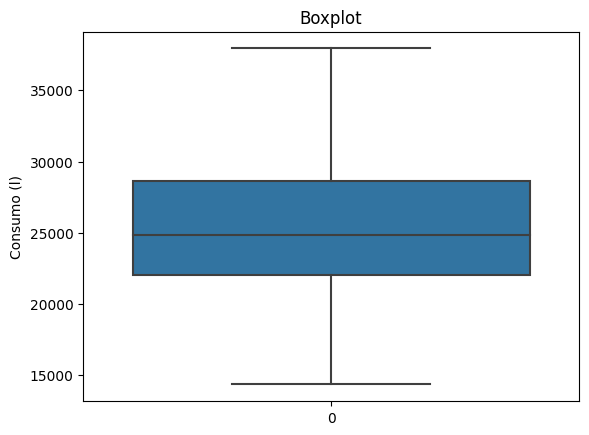

In [ ]:
ax = sns.boxplot(data=dados['Y'], orient='v')
ax.set_title('Boxplot')
ax.set_ylabel('Consumo (l)')

Text(0, 0.5, 'Temperatura (Celsius)')

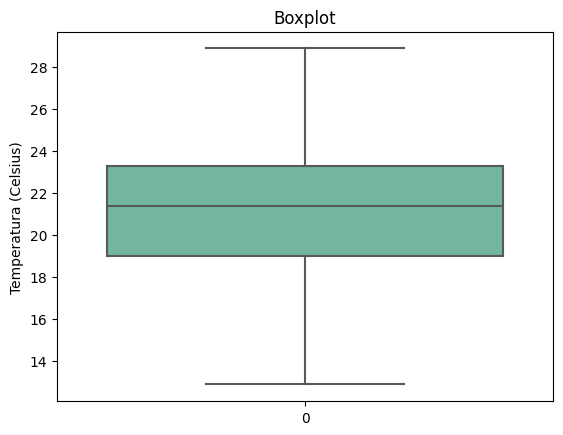

In [ ]:
ax = sns.boxplot(data=dados['X'], orient='v',palette='Set2')
ax.set_title('Boxplot')
ax.set_ylabel('Temperatura (Celsius)')

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

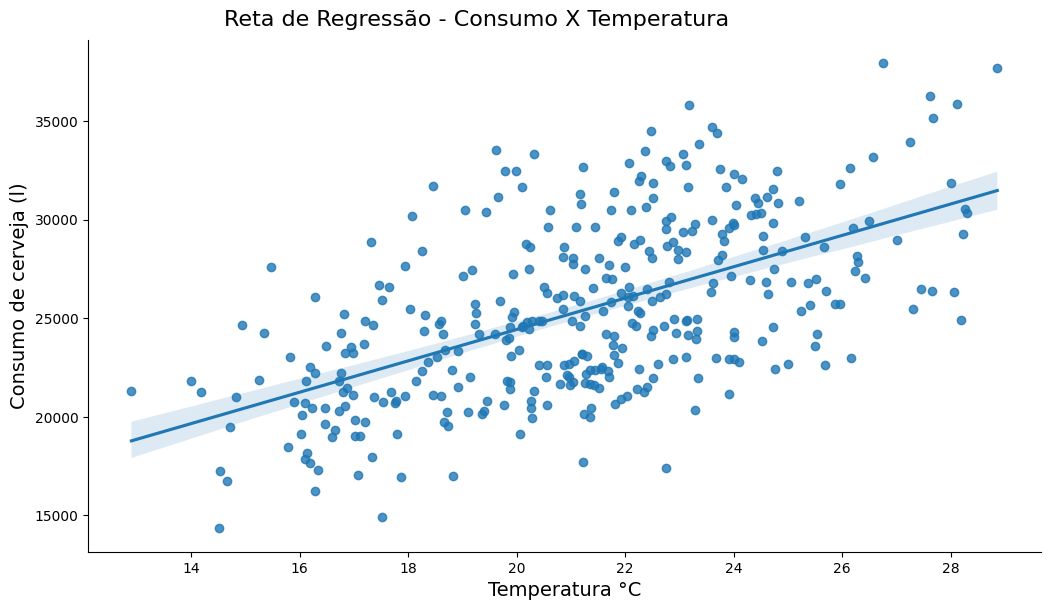

In [ ]:
ax = sns.lmplot(x="X", y="Y", data=dados)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura °C", fontsize=14)
ax.set_ylabels("Consumo de cerveja (l)", fontsize=14)
ax

### <font color='red'>Utilizando a matriz de correlação</font>

In [ ]:
dados.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: Sim, porém fraca

É possível quantificar a intensidade dessa relação?

Resp.: Sim, conforme a matriz há uma pequena relação.

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: Não, são necessários mais dados além da regressão para estabelecer uma relação de causa e efeito.

### Prepare os dados para estimar um modelo de regressão linear simples

In [ ]:
Y = dados.Y
X = sm.add_constant(dados.X)

### Estime o modelo de regressão linear simples

In [ ]:
regressao = sm.OLS(Y, X).fit()

### Visualize o resultado da regressão

In [ ]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           1.87e-33
Time:                        18:47:07   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Obtenha o $Y$ previsto

In [ ]:
dados['Y_previsto'] = regressao.predict()
dados.head()

,Y,X,Y_previsto
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [ ]:
previsao_42graus = regressao.predict([1,42])
previsao_42graus[0].round(2)

41913.97

#### <font color='green'> R.:</font> Cerca de 41914 litros.

### Obtenha os resíduos da regressão

In [ ]:
dados['Residuos'] = regressao.resid
dados.head()

,Y,X,Y_previsto,Residuos
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

Text(0, 0.5, 'Resíduos')

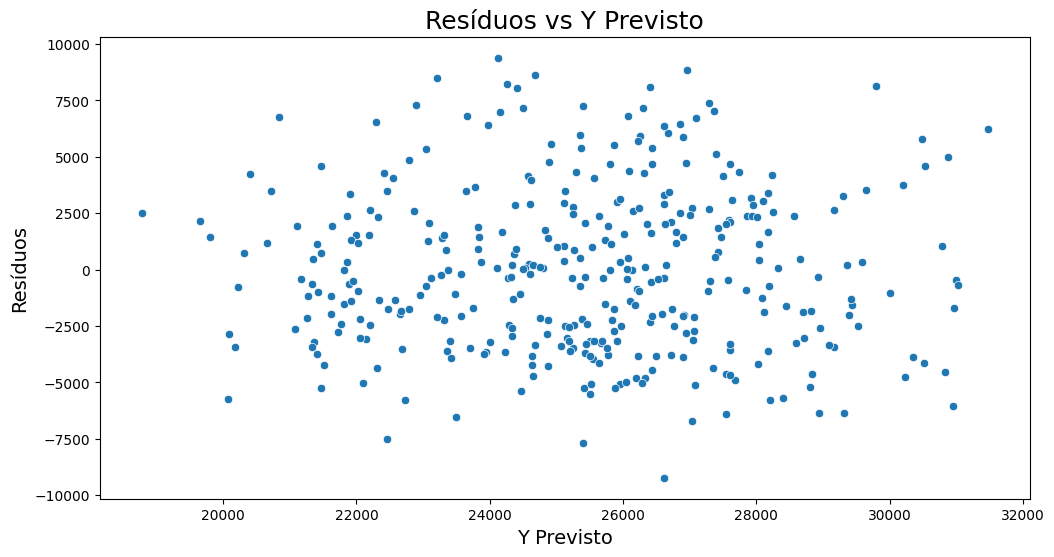

In [ ]:
ax = sns.scatterplot(x = dados.Y_previsto, y = dados.Residuos)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Y Previsto', fontsize=18)
ax.set_xlabel('Y Previsto', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)

### Obtenha o QQPlot dos resíduos

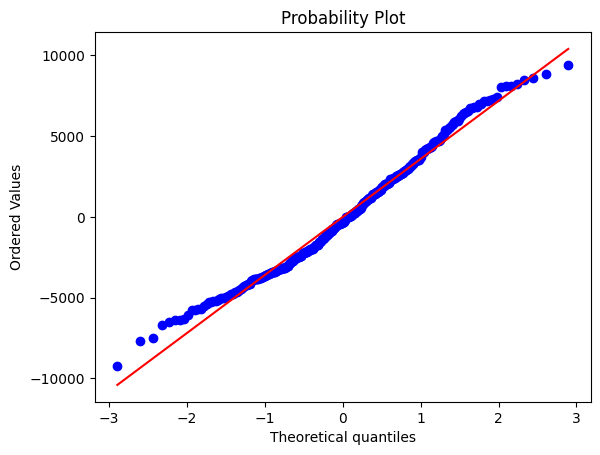

In [ ]:
(_, (_, _, _)) = probplot(dados.Residuos, plot=plt)

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

#### Há algum problema nos resíduos porque não seguem exatamente uma linha reta, se dispersando em alguns pontos. Talvez sejam necessários mais dados ou aplicar um modelo de regressão múltipla.

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

### Obtendo $SQE$ diretamente com `ssr()` (sum of sqared residuals)

In [ ]:
sqe = regressao.ssr
sqe

4718394688.067693

### Obtendo $SQR$ com ess (Explained sum of squares)

In [ ]:
sqr = regressao.ess
sqr

2325899486.7377863

### Relação entre as somas de quadrados

# $$SQT = SQR + SQE$$

In [ ]:
sqt = sqr + sqe
sqt

7044294174.805479

In [ ]:
r2 = sqr / sqt
r2

0.33018204933243206

### Vamos conferir se o cálculo está certo verificando o valor dado por `rsquared`

In [ ]:
regressao.rsquared

0.330182049332432

### Portanto, os valores estão corretos e temos um $R^2$ de cerca de $0.3302$